## Data Collection

In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
!pwd

/content


In [3]:
!pip install kaggle

In [4]:
cd /content/gdrive/MyDrive/food

/content/gdrive/MyDrive/food


In [5]:
!ls

codebook_food.docx  food-choices.zip  food_coded.csv  kaggle.json


In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/food/"

In [8]:
!kaggle datasets download -d borapajo/food-choices
!unzip '/content/gdrive/MyDrive/food/food-choices.zip'

food-choices.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
import pandas as pd
data=pd.read_csv("/content/gdrive/MyDrive/food/food_coded.csv")

In [11]:
data

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135


#Data Cleaning

In [12]:
data.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

In [13]:
column=['cook','eating_out','employment','ethnic_food', 'exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']

In [14]:
d=data[column]

In [15]:
d

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...
120,3.0,2,1.0,4,2.0,5,4.0,3.0,4,1.0,5
121,3.0,4,3.0,3,2.0,4,2.0,1.0,4,NaN,5
122,3.0,3,3.0,5,2.0,4,2.0,1.0,4,2.0,4
123,3.0,5,2.0,2,1.0,5,4.0,1.0,3,2.0,3


## Visualizing Data




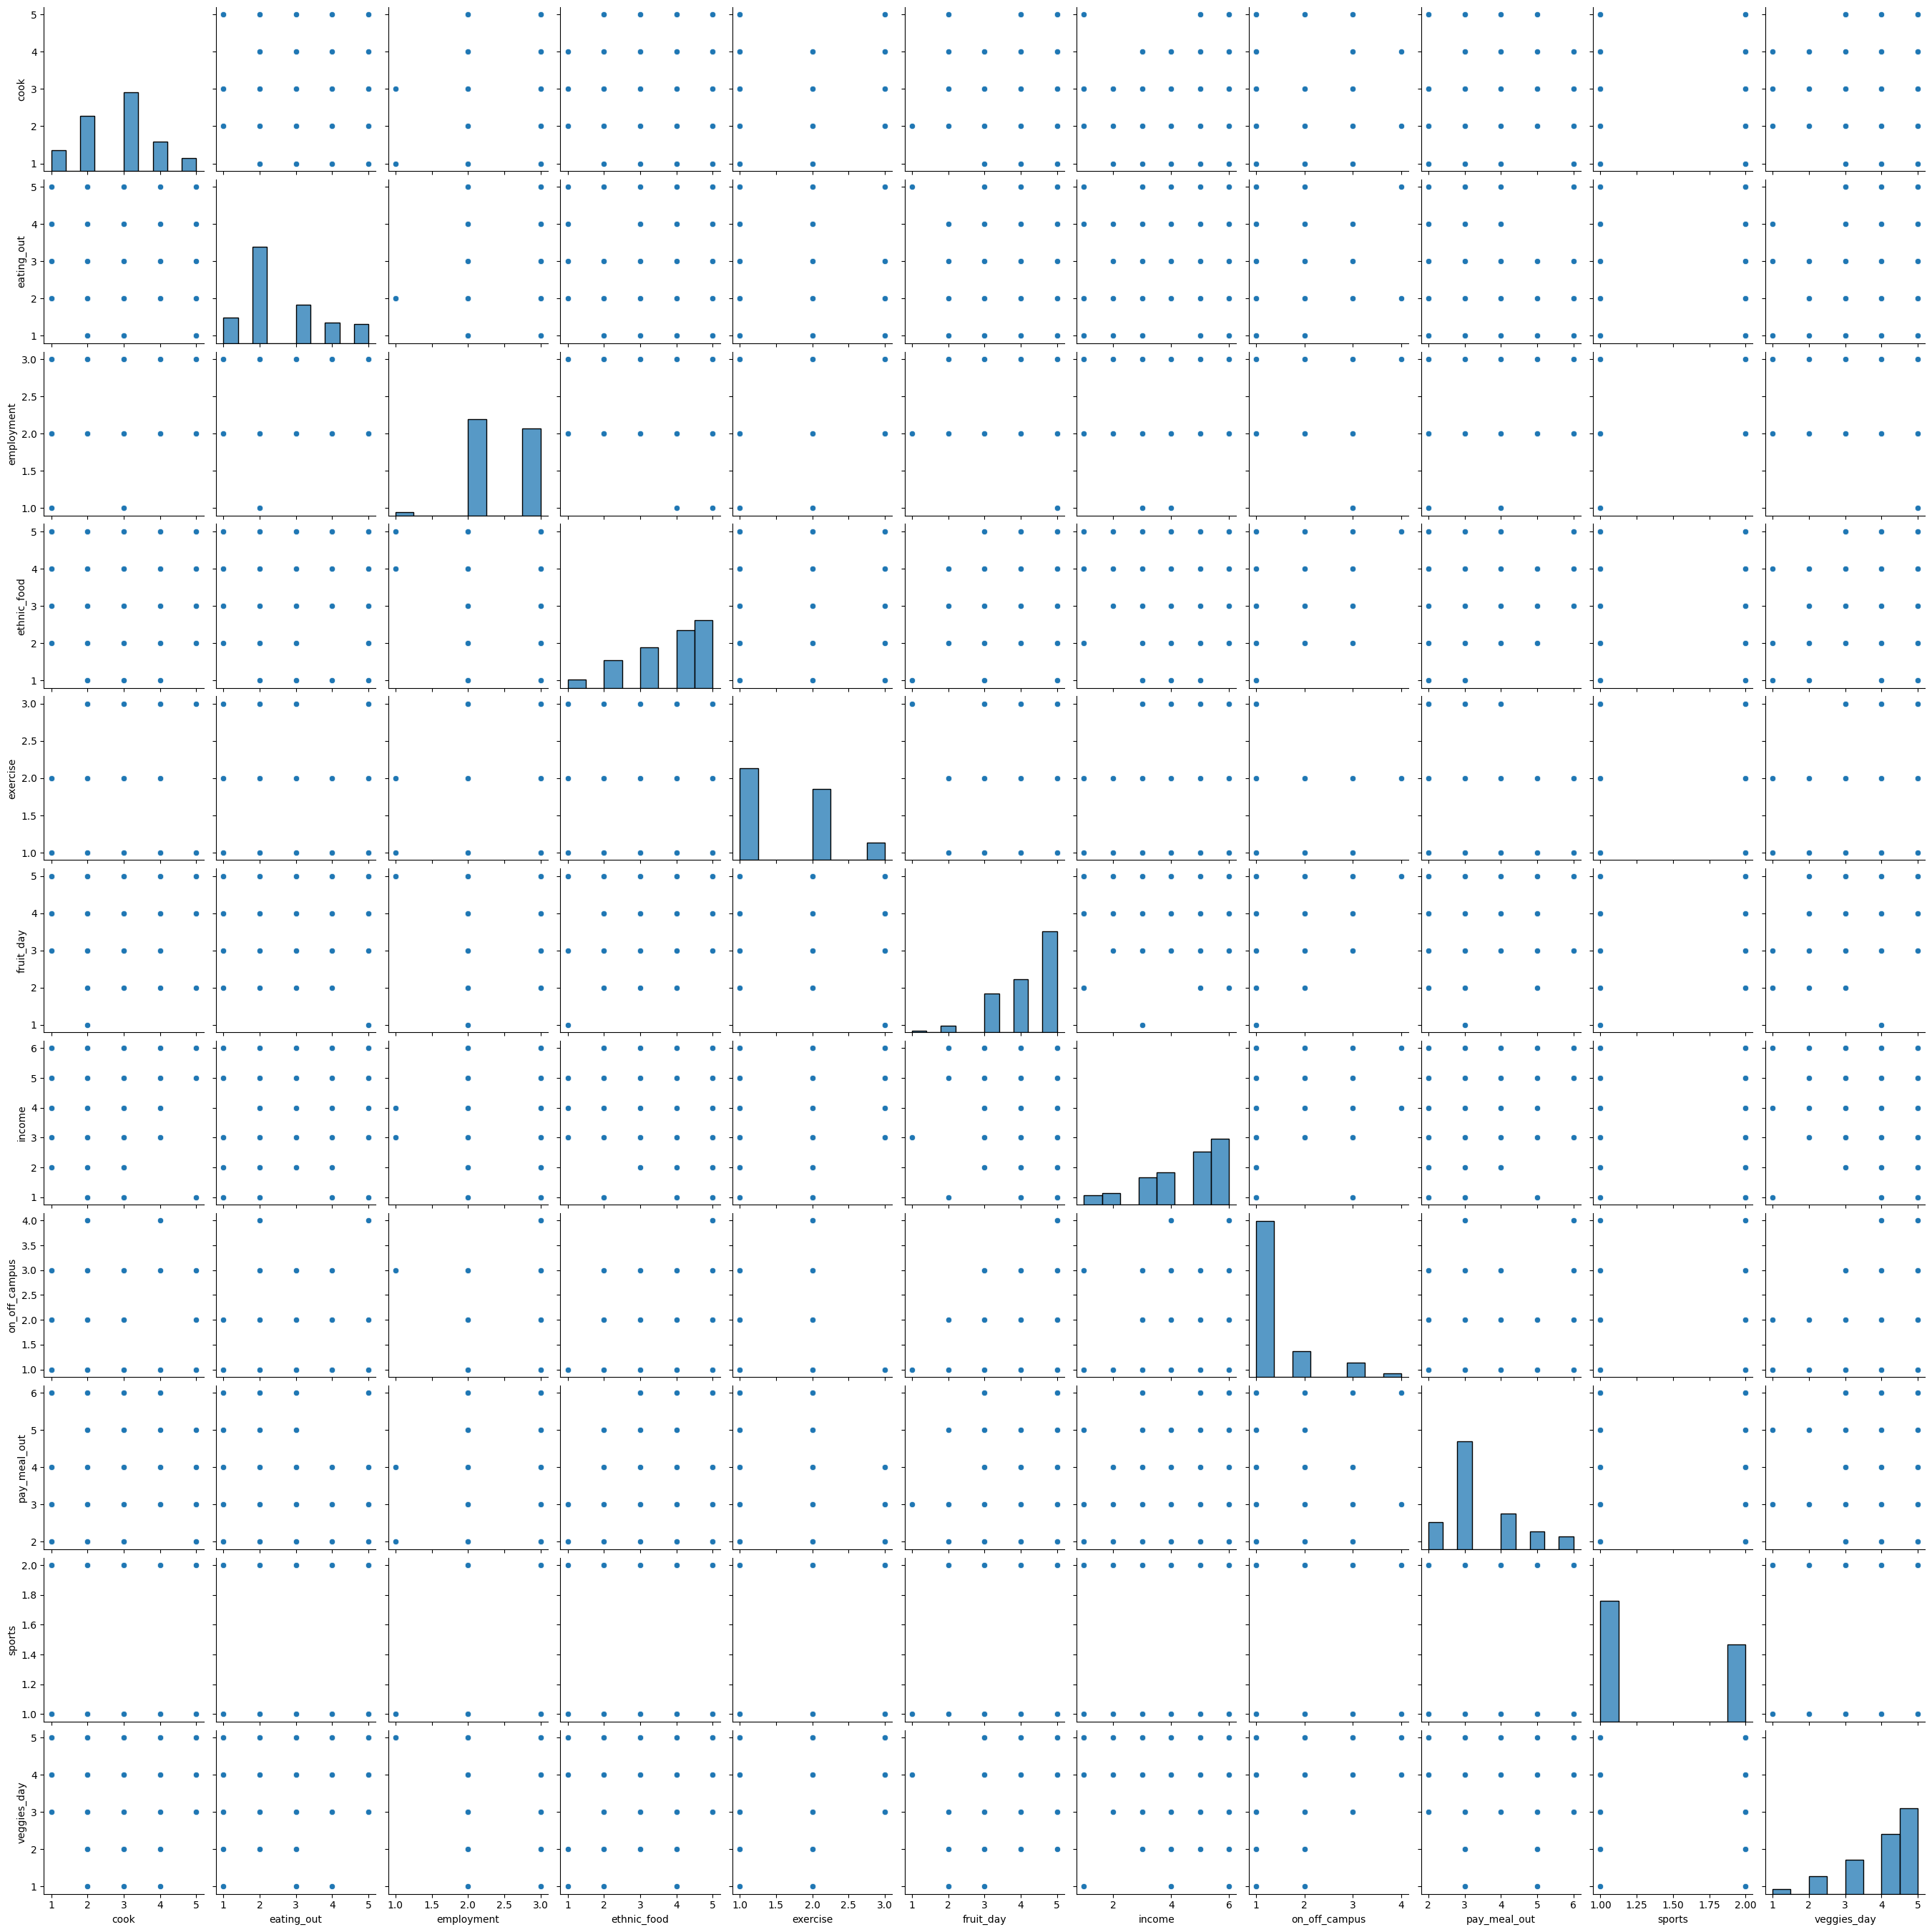

In [16]:
import seaborn as sns
sns.pairplot(d)

[Text(1, 0, 'cook'),
 Text(2, 0, 'eating_out'),
 Text(3, 0, 'employment'),
 Text(4, 0, 'ethnic_food'),
 Text(5, 0, 'exercise'),
 Text(6, 0, 'fruit_day'),
 Text(7, 0, 'income'),
 Text(8, 0, 'on_off_campus'),
 Text(9, 0, 'pay_meal_out'),
 Text(10, 0, 'sports'),
 Text(11, 0, 'veggies_day')]

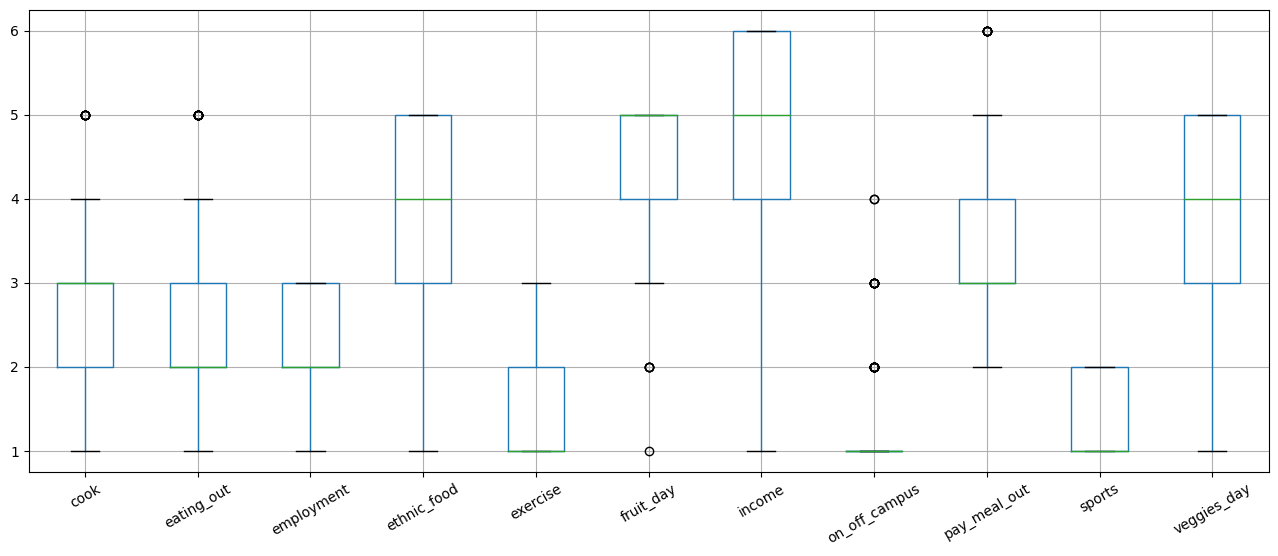

In [18]:
# Creating Boxplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
ax=d.boxplot(figsize=(16,6))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [19]:
d.shape

(125, 11)

In [20]:
s=d.dropna()

## Run KMeans Clustering on the data

In [22]:
! pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=00a97915df284fe6639b17b954c8cb93edd2c007c4bc469d8a11ecff6dac9630
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built MiniSom


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopy
from sklearn import preprocessing, cluster
import scipy
import minisom

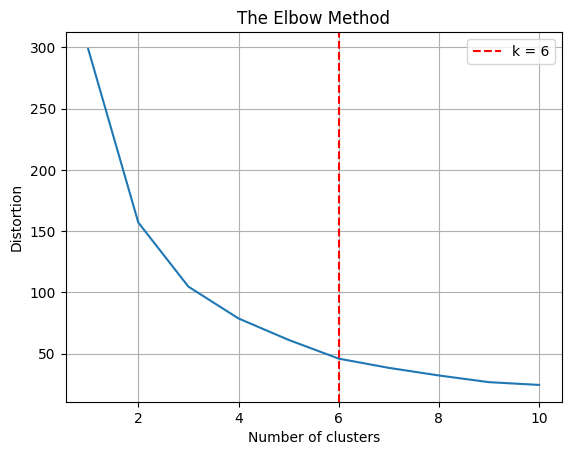

In [24]:
f=['cook','income']
X = s[f]
max_k = 10
## iterations
distortions = []
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters',
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

## Obtaining Geolocational Data Using Foursquare API

In [25]:
from pandas.io.json import json_normalize
import folium
from geopy.geocoders import Nominatim
import requests
CLIENT_ID = "KTCJJ2YZ2143QHEZ2JAQS4FJIO5DLSDO0YN4YBXPMI5NKTEF" # your Foursquare ID
CLIENT_SECRET = "KNG2LO22BPLHN1E3OAHWLYQ5PQBN14XYZMEMAS0CPJEJKOTR" # your Foursquare Secret
VERSION = '20200316'
LIMIT = 10000

In [29]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    44.699487, -73.452912,
    30000,
    LIMIT)

In [30]:
results = requests.get(url).json()

In [31]:
results

{'meta': {'code': 200, 'requestId': '6526ed2747f5a55cdce2258b'},
 'response': {'queryRefinements': {'target': {'type': 'path',
    'url': '/venue/explore',
    'params': {'ll': '44.699487,-73.452912', 'radius': '30000'}},
   'refinements': [{'query': 'Food'},
    {'query': 'Nightlife'},
    {'query': 'Coffee'},
    {'query': 'Shops'},
    {'query': 'Arts'},
    {'query': 'Outdoors'}]},
  'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Plattsburgh',
  'headerFullLocation': 'Plattsburgh',
  'headerLocationGranularity': 'city',
  'totalResults': 161,
  'suggestedBounds': {'ne': {'lat': 44.969487270000265,
    'lng': -73.07377024380648},
   'sw': {'lat': 44.42948672999973, 'lng': -73.83205375619352}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'typ

In [32]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)

<ipython-input-32-745f8c248222>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  nearby_venues = json_normalize(venues)


In [33]:
nearby_venues

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.location.crossStreet,venue.venuePage.id,venue.events.count,venue.events.summary,venue.delivery.id,venue.delivery.url,venue.delivery.provider.name,venue.delivery.provider.icon.prefix,venue.delivery.provider.icon.sizes,venue.delivery.provider.icon.name
0,e-0-4bbf8a1d920eb7131f83172c-0,0,"[{'summary': 'This spot is popular', 'type': '...",4bbf8a1d920eb7131f83172c,Mickey's Bar,26 Riley Ave,44.707358,-73.453895,"[{'label': 'display', 'lat': 44.70735840571829...",879,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e-0-4c06f75f88ba95212cf0e78f-1,0,"[{'summary': 'This spot is popular', 'type': '...",4c06f75f88ba95212cf0e78f,Fantastic Planet,164 Boynton Ave,44.708482,-73.467733,"[{'label': 'display', 'lat': 44.70848150641228...",1541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e-0-4bbfdc582a89ef3b80c5ef88-2,0,"[{'summary': 'This spot is popular', 'type': '...",4bbfdc582a89ef3b80c5ef88,North Country Co-op,25 Bridge St,44.697679,-73.451761,"[{'label': 'display', 'lat': 44.69767915193819...",220,...,at Durkee St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e-0-4be3102e21d5a593c1161811-3,0,"[{'summary': 'This spot is popular', 'type': '...",4be3102e21d5a593c1161811,McSweeney's,600 State Route 3,44.696143,-73.506368,"[{'label': 'display', 'lat': 44.69614269506283...",4246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e-0-4b9c6cd8f964a520ba6736e3-4,0,"[{'summary': 'This spot is popular', 'type': '...",4b9c6cd8f964a520ba6736e3,The Pepper,13 City Hall Pl,44.698128,-73.452087,"[{'label': 'display', 'lat': 44.69812805041619...",164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-4bd5a16f637ba5930baef670-95,0,"[{'summary': 'This spot is popular', 'type': '...",4bd5a16f637ba5930baef670,Sam's Club,7 Consumer Sq,44.692424,-73.485084,"[{'label': 'display', 'lat': 44.69242422860726...",2664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,e-0-4d6a68344c4637045ec5afb3-96,0,"[{'summary': 'This spot is popular', 'type': '...",4d6a68344c4637045ec5afb3,Stewart's Shops,262 Rugar St,44.687572,-73.484427,"[{'label': 'display', 'lat': 44.68757249539074...",2824,...,NaN,549886380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,e-0-500ec8c9e4b02b08aa3a5e5b-97,0,"[{'summary': 'This spot is popular', 'type': '...",500ec8c9e4b02b08aa3a5e5b,SUBWAY,685 State Route 3,44.694930,-73.514247,"[{'label': 'display', 'lat': 44.69492968861313...",4879,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,e-0-4bead65ea9900f475ffc1640-98,0,"[{'summary': 'This spot is popular', 'type': '...",4bead65ea9900f475ffc1640,Ronnie's Michigan Stand,1265-1301 New York 3,44.712555,-73.561749,"[{'label': 'display', 'lat': 44.71255463453848...",8732,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
nearby_venues

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.location.crossStreet,venue.venuePage.id,venue.events.count,venue.events.summary,venue.delivery.id,venue.delivery.url,venue.delivery.provider.name,venue.delivery.provider.icon.prefix,venue.delivery.provider.icon.sizes,venue.delivery.provider.icon.name
0,e-0-4bbf8a1d920eb7131f83172c-0,0,"[{'summary': 'This spot is popular', 'type': '...",4bbf8a1d920eb7131f83172c,Mickey's Bar,26 Riley Ave,44.707358,-73.453895,"[{'label': 'display', 'lat': 44.70735840571829...",879,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e-0-4c06f75f88ba95212cf0e78f-1,0,"[{'summary': 'This spot is popular', 'type': '...",4c06f75f88ba95212cf0e78f,Fantastic Planet,164 Boynton Ave,44.708482,-73.467733,"[{'label': 'display', 'lat': 44.70848150641228...",1541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e-0-4bbfdc582a89ef3b80c5ef88-2,0,"[{'summary': 'This spot is popular', 'type': '...",4bbfdc582a89ef3b80c5ef88,North Country Co-op,25 Bridge St,44.697679,-73.451761,"[{'label': 'display', 'lat': 44.69767915193819...",220,...,at Durkee St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e-0-4be3102e21d5a593c1161811-3,0,"[{'summary': 'This spot is popular', 'type': '...",4be3102e21d5a593c1161811,McSweeney's,600 State Route 3,44.696143,-73.506368,"[{'label': 'display', 'lat': 44.69614269506283...",4246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e-0-4b9c6cd8f964a520ba6736e3-4,0,"[{'summary': 'This spot is popular', 'type': '...",4b9c6cd8f964a520ba6736e3,The Pepper,13 City Hall Pl,44.698128,-73.452087,"[{'label': 'display', 'lat': 44.69812805041619...",164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-4bd5a16f637ba5930baef670-95,0,"[{'summary': 'This spot is popular', 'type': '...",4bd5a16f637ba5930baef670,Sam's Club,7 Consumer Sq,44.692424,-73.485084,"[{'label': 'display', 'lat': 44.69242422860726...",2664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,e-0-4d6a68344c4637045ec5afb3-96,0,"[{'summary': 'This spot is popular', 'type': '...",4d6a68344c4637045ec5afb3,Stewart's Shops,262 Rugar St,44.687572,-73.484427,"[{'label': 'display', 'lat': 44.68757249539074...",2824,...,NaN,549886380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,e-0-500ec8c9e4b02b08aa3a5e5b-97,0,"[{'summary': 'This spot is popular', 'type': '...",500ec8c9e4b02b08aa3a5e5b,SUBWAY,685 State Route 3,44.694930,-73.514247,"[{'label': 'display', 'lat': 44.69492968861313...",4879,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,e-0-4bead65ea9900f475ffc1640-98,0,"[{'summary': 'This spot is popular', 'type': '...",4bead65ea9900f475ffc1640,Ronnie's Michigan Stand,1265-1301 New York 3,44.712555,-73.561749,"[{'label': 'display', 'lat': 44.71255463453848...",8732,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# adding number of restaurant and others
resta=[]
oth=[]
for lat,long in zip(nearby_venues['venue.location.lat'],nearby_venues['venue.location.lng']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
      CLIENT_ID,
      CLIENT_SECRET,
      VERSION,
      lat,long,
      1000,
      100)
    res = requests.get(url).json()
    venue = res['response']['groups'][0]['items']
    nearby_venue = json_normalize(venue)
    df=nearby_venue['venue.categories']

    g=[]
    for i in range(0,df.size):
      g.append(df[i][0]['icon']['prefix'].find('food'))
    co=0
    for i in g:
      if i>1:
        co+=1
    resta.append(co)
    oth.append(len(g)-co)

nearby_venues['restaurant']=resta
nearby_venues['others']=oth
nearby_venues

<ipython-input-36-e344e132f2a7>:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  nearby_venue = json_normalize(venue)
<ipython-input-36-e344e132f2a7>:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  nearby_venue = json_normalize(venue)
<ipython-input-36-e344e132f2a7>:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  nearby_venue = json_normalize(venue)
<ipython-input-36-e344e132f2a7>:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  nearby_venue = json_normalize(venue)
<ipython-input-36-e344e132f2a7>:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  nearby_venue = json_normalize(venue)
<ipython-input-36-e344e132f2a7>:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  nearby_venue = js

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.events.count,venue.events.summary,venue.delivery.id,venue.delivery.url,venue.delivery.provider.name,venue.delivery.provider.icon.prefix,venue.delivery.provider.icon.sizes,venue.delivery.provider.icon.name,restaurant,others
0,e-0-4bbf8a1d920eb7131f83172c-0,0,"[{'summary': 'This spot is popular', 'type': '...",4bbf8a1d920eb7131f83172c,Mickey's Bar,26 Riley Ave,44.707358,-73.453895,"[{'label': 'display', 'lat': 44.70735840571829...",879,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,14
1,e-0-4c06f75f88ba95212cf0e78f-1,0,"[{'summary': 'This spot is popular', 'type': '...",4c06f75f88ba95212cf0e78f,Fantastic Planet,164 Boynton Ave,44.708482,-73.467733,"[{'label': 'display', 'lat': 44.70848150641228...",1541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,7
2,e-0-4bbfdc582a89ef3b80c5ef88-2,0,"[{'summary': 'This spot is popular', 'type': '...",4bbfdc582a89ef3b80c5ef88,North Country Co-op,25 Bridge St,44.697679,-73.451761,"[{'label': 'display', 'lat': 44.69767915193819...",220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,16
3,e-0-4be3102e21d5a593c1161811-3,0,"[{'summary': 'This spot is popular', 'type': '...",4be3102e21d5a593c1161811,McSweeney's,600 State Route 3,44.696143,-73.506368,"[{'label': 'display', 'lat': 44.69614269506283...",4246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,17
4,e-0-4b9c6cd8f964a520ba6736e3-4,0,"[{'summary': 'This spot is popular', 'type': '...",4b9c6cd8f964a520ba6736e3,The Pepper,13 City Hall Pl,44.698128,-73.452087,"[{'label': 'display', 'lat': 44.69812805041619...",164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-4bd5a16f637ba5930baef670-95,0,"[{'summary': 'This spot is popular', 'type': '...",4bd5a16f637ba5930baef670,Sam's Club,7 Consumer Sq,44.692424,-73.485084,"[{'label': 'display', 'lat': 44.69242422860726...",2664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,36
96,e-0-4d6a68344c4637045ec5afb3-96,0,"[{'summary': 'This spot is popular', 'type': '...",4d6a68344c4637045ec5afb3,Stewart's Shops,262 Rugar St,44.687572,-73.484427,"[{'label': 'display', 'lat': 44.68757249539074...",2824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,22
97,e-0-500ec8c9e4b02b08aa3a5e5b-97,0,"[{'summary': 'This spot is popular', 'type': '...",500ec8c9e4b02b08aa3a5e5b,SUBWAY,685 State Route 3,44.694930,-73.514247,"[{'label': 'display', 'lat': 44.69492968861313...",4879,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,8
98,e-0-4bead65ea9900f475ffc1640-98,0,"[{'summary': 'This spot is popular', 'type': '...",4bead65ea9900f475ffc1640,Ronnie's Michigan Stand,1265-1301 New York 3,44.712555,-73.561749,"[{'label': 'display', 'lat': 44.71255463453848...",8732,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4


In [52]:
# change column name
lat=nearby_venues['venue.location.lat']
long=nearby_venues['venue.location.lng']

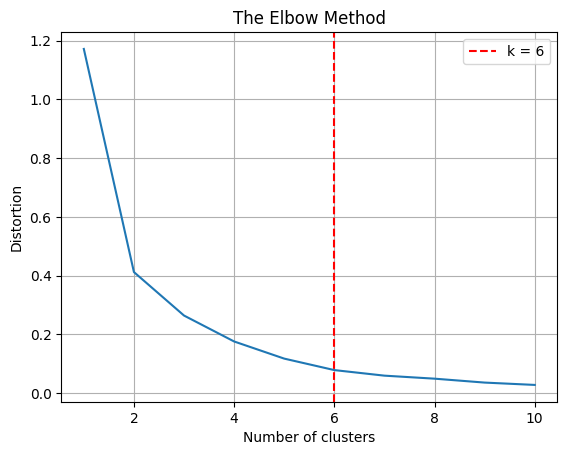

In [53]:
# running K means clustering with optimal value of k using elbow method
f=['venue.location.lat','venue.location.lng']
X = nearby_venues[f]
max_k = 10
## iterations
distortions = []
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters',
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [54]:
city = "Plattsburgh"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, long]:", location)

City of Plattsburgh, Clinton County, New York, United States
[lat, long]: [44.69282, -73.45562]


In [55]:
nearby_venues.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.events.count,venue.events.summary,venue.delivery.id,venue.delivery.url,venue.delivery.provider.name,venue.delivery.provider.icon.prefix,venue.delivery.provider.icon.sizes,venue.delivery.provider.icon.name,restaurant,others
0,e-0-4bbf8a1d920eb7131f83172c-0,0,"[{'summary': 'This spot is popular', 'type': '...",4bbf8a1d920eb7131f83172c,Mickey's Bar,26 Riley Ave,44.707358,-73.453895,"[{'label': 'display', 'lat': 44.70735840571829...",879,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,14
1,e-0-4c06f75f88ba95212cf0e78f-1,0,"[{'summary': 'This spot is popular', 'type': '...",4c06f75f88ba95212cf0e78f,Fantastic Planet,164 Boynton Ave,44.708482,-73.467733,"[{'label': 'display', 'lat': 44.70848150641228...",1541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,7
2,e-0-4bbfdc582a89ef3b80c5ef88-2,0,"[{'summary': 'This spot is popular', 'type': '...",4bbfdc582a89ef3b80c5ef88,North Country Co-op,25 Bridge St,44.697679,-73.451761,"[{'label': 'display', 'lat': 44.69767915193819...",220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,16
3,e-0-4be3102e21d5a593c1161811-3,0,"[{'summary': 'This spot is popular', 'type': '...",4be3102e21d5a593c1161811,McSweeney's,600 State Route 3,44.696143,-73.506368,"[{'label': 'display', 'lat': 44.69614269506283...",4246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,17
4,e-0-4b9c6cd8f964a520ba6736e3-4,0,"[{'summary': 'This spot is popular', 'type': '...",4b9c6cd8f964a520ba6736e3,The Pepper,13 City Hall Pl,44.698128,-73.452087,"[{'label': 'display', 'lat': 44.69812805041619...",164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,16


In [56]:
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.lat',
       'venue.location.lng', 'venue.location.labeledLatLngs',
       'venue.location.distance', 'venue.location.postalCode',
       'venue.location.cc', 'venue.location.city', 'venue.location.state',
       'venue.location.country', 'venue.location.formattedAddress',
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.createdAt', 'photo.id', 'photo.createdAt', 'photo.prefix',
       'photo.suffix', 'photo.width', 'photo.height', 'photo.visibility',
       'venue.location.crossStreet', 'venue.venuePage.id',
       'venue.events.count', 'venue.events.summary', 'venue.delivery.id',
       'venue.delivery.url', 'venue.delivery.provider.name',
       'venue.delivery.provider.icon.prefix',
       'venue.delivery.provider.icon.sizes',
       'venue.delivery.provider.icon.name', 'restaurant', 'others'],
      dtype='object')

##Data Cleaning Process for Extracting Necessary Columns in the Dataset

In [65]:
n=nearby_venues.drop(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name',
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.cc',
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.location.crossStreet', 'venue.location.address','venue.location.city',
       'venue.location.state', 'venue.location.crossStreet',
       'venue.venuePage.id', 'venue.createdAt' , 'photo.id', 'photo.createdAt', 'photo.prefix', 'photo.suffix',
       'photo.width', 'photo.height', 'photo.visibility', 'venue.events.count',
       'venue.events.summary', 'venue.delivery.id', 'venue.delivery.url',
       'venue.delivery.provider.name', 'venue.delivery.provider.icon.prefix',
       'venue.delivery.provider.icon.sizes',
       'venue.delivery.provider.icon.name',
       'venue.location.postalCode','venue.location.country'],axis=1)

In [66]:
n.columns

Index(['venue.location.lat', 'venue.location.lng',
       'venue.location.formattedAddress', 'restaurant', 'others'],
      dtype='object')

##New Dataset

In [67]:
n

,venue.location.lat,venue.location.lng,venue.location.formattedAddress,restaurant,others
0,44.707358,-73.453895,"[26 Riley Ave, Plattsburgh, NY 12901, United S...",4,14
1,44.708482,-73.467733,"[164 Boynton Ave, Plattsburgh, NY 12901, Unite...",2,7
2,44.697679,-73.451761,"[25 Bridge St (at Durkee St), Plattsburgh, NY ...",21,16
3,44.696143,-73.506368,"[600 State Route 3, Plattsburgh, NY 12901, Uni...",9,17
4,44.698128,-73.452087,"[13 City Hall Pl, Plattsburgh, NY 12901, Unite...",21,16
...,...,...,...,...,...
95,44.692424,-73.485084,"[7 Consumer Sq, Plattsburgh, NY 12901, United ...",37,36
96,44.687572,-73.484427,"[262 Rugar St, Plattsburgh, NY 12901, United S...",5,22
97,44.694930,-73.514247,"[685 State Route 3, Plattsburgh, NY 12901, Uni...",6,8
98,44.712555,-73.561749,"[1265-1301 New York 3, Plattsburgh, NY 12962, ...",2,4


## Dropping Nan Values from Dataset

In [68]:
n=n.dropna()
n = n.rename(columns={'venue.location.lat': 'lat', 'venue.location.lng': 'long'})
n

,lat,long,venue.location.formattedAddress,restaurant,others
0,44.707358,-73.453895,"[26 Riley Ave, Plattsburgh, NY 12901, United S...",4,14
1,44.708482,-73.467733,"[164 Boynton Ave, Plattsburgh, NY 12901, Unite...",2,7
2,44.697679,-73.451761,"[25 Bridge St (at Durkee St), Plattsburgh, NY ...",21,16
3,44.696143,-73.506368,"[600 State Route 3, Plattsburgh, NY 12901, Uni...",9,17
4,44.698128,-73.452087,"[13 City Hall Pl, Plattsburgh, NY 12901, Unite...",21,16
...,...,...,...,...,...
95,44.692424,-73.485084,"[7 Consumer Sq, Plattsburgh, NY 12901, United ...",37,36
96,44.687572,-73.484427,"[262 Rugar St, Plattsburgh, NY 12901, United S...",5,22
97,44.694930,-73.514247,"[685 State Route 3, Plattsburgh, NY 12901, Uni...",6,8
98,44.712555,-73.561749,"[1265-1301 New York 3, Plattsburgh, NY 12962, ...",2,4


In [69]:
# converting Every Row of Column of 'venue.location.formattedAddress'from List to String
n['venue.location.formattedAddress']

0     [26 Riley Ave, Plattsburgh, NY 12901, United S...
1     [164 Boynton Ave, Plattsburgh, NY 12901, Unite...
2     [25 Bridge St (at Durkee St), Plattsburgh, NY ...
3     [600 State Route 3, Plattsburgh, NY 12901, Uni...
4     [13 City Hall Pl, Plattsburgh, NY 12901, Unite...
                            ...                        
95    [7 Consumer Sq, Plattsburgh, NY 12901, United ...
96    [262 Rugar St, Plattsburgh, NY 12901, United S...
97    [685 State Route 3, Plattsburgh, NY 12901, Uni...
98    [1265-1301 New York 3, Plattsburgh, NY 12962, ...
99    [18 Severance Grn, Colchester, VT 05446, Unite...
Name: venue.location.formattedAddress, Length: 100, dtype: object

In [70]:
spec_chars = ["[","]"]
for char in spec_chars:
  n['venue.location.formattedAddress'] = n['venue.location.formattedAddress'].astype(str).str.replace(char, ' ')


<ipython-input-70-804ee3019677>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  n['venue.location.formattedAddress'] = n['venue.location.formattedAddress'].astype(str).str.replace(char, ' ')


In [71]:
n

,lat,long,venue.location.formattedAddress,restaurant,others
0,44.707358,-73.453895,"'26 Riley Ave', 'Plattsburgh, NY 12901', 'Uni...",4,14
1,44.708482,-73.467733,"'164 Boynton Ave', 'Plattsburgh, NY 12901', '...",2,7
2,44.697679,-73.451761,"'25 Bridge St (at Durkee St)', 'Plattsburgh, ...",21,16
3,44.696143,-73.506368,"'600 State Route 3', 'Plattsburgh, NY 12901',...",9,17
4,44.698128,-73.452087,"'13 City Hall Pl', 'Plattsburgh, NY 12901', '...",21,16
...,...,...,...,...,...
95,44.692424,-73.485084,"'7 Consumer Sq', 'Plattsburgh, NY 12901', 'Un...",37,36
96,44.687572,-73.484427,"'262 Rugar St', 'Plattsburgh, NY 12901', 'Uni...",5,22
97,44.694930,-73.514247,"'685 State Route 3', 'Plattsburgh, NY 12901',...",6,8
98,44.712555,-73.561749,"'1265-1301 New York 3', 'Plattsburgh, NY 1296...",2,4


#Plot the clustered locations on a map

In [72]:
x, y = "lat", "long"
color = "restaurant"
size = "others"
popup = "venue.location.formattedAddress"
data = n.copy()

## create color column
lst_colors=["red","green","orange"]
lst_elements = sorted(list(n[color].unique()))

## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)

## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]],popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend


## plot the map
map_

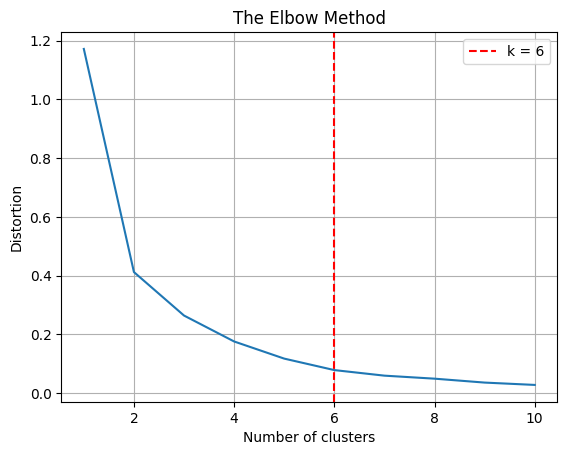

In [73]:
X = n[["lat","long"]]
max_k = 10
## iterations
distortions = []
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters',
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()


In [74]:
k = 6
model = cluster.KMeans(n_clusters=k, init='k-means++')
X = n[["lat","long"]]
## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)
## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_,
                     dtf_X.drop("cluster", axis=1).values)
dtf_X["centroids"] = 0
for i in closest:
    dtf_X["centroids"].iloc[i] = 1
## add clustering info to the original dataset
n[["cluster","centroids"]] = dtf_X[["cluster","centroids"]]
n

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-74-c08936146907>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf_X["centroids"].iloc[i] = 1


,lat,long,venue.location.formattedAddress,restaurant,others,cluster,centroids
0,44.707358,-73.453895,"'26 Riley Ave', 'Plattsburgh, NY 12901', 'Uni...",4,14,5,0
1,44.708482,-73.467733,"'164 Boynton Ave', 'Plattsburgh, NY 12901', '...",2,7,5,0
2,44.697679,-73.451761,"'25 Bridge St (at Durkee St)', 'Plattsburgh, ...",21,16,5,0
3,44.696143,-73.506368,"'600 State Route 3', 'Plattsburgh, NY 12901',...",9,17,0,0
4,44.698128,-73.452087,"'13 City Hall Pl', 'Plattsburgh, NY 12901', '...",21,16,5,0
...,...,...,...,...,...,...,...
95,44.692424,-73.485084,"'7 Consumer Sq', 'Plattsburgh, NY 12901', 'Un...",37,36,0,0
96,44.687572,-73.484427,"'262 Rugar St', 'Plattsburgh, NY 12901', 'Uni...",5,22,0,0
97,44.694930,-73.514247,"'685 State Route 3', 'Plattsburgh, NY 12901',...",6,8,0,0
98,44.712555,-73.561749,"'1265-1301 New York 3', 'Plattsburgh, NY 1296...",2,4,0,0


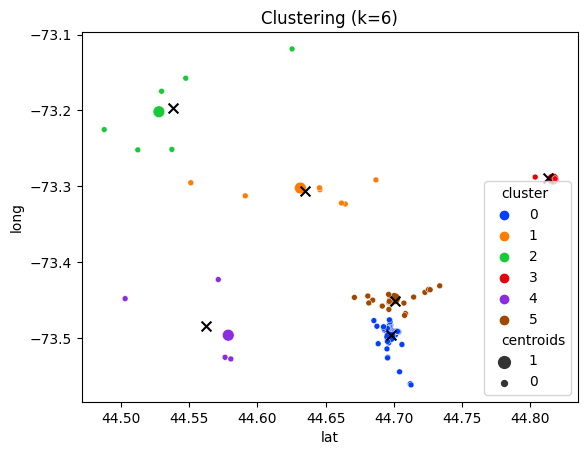

In [75]:
## plot
fig, ax = plt.subplots()
sns.scatterplot(x="lat", y="long", data=n,
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black',
           marker="x")

In [76]:
model = cluster.AffinityPropagation()


Text(0.5, 1.0, 'Clustering (k=6)')

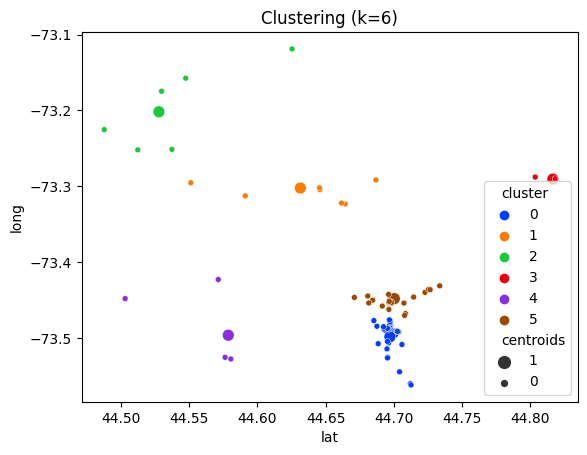

In [77]:
k = n["cluster"].nunique()
sns.scatterplot(x="lat", y="long", data=n,
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief").set_title('Clustering (k='+str(k)+')')

In [78]:
x, y = "lat", "long"
color = "cluster"
size = "restaurant"
popup = "venue.location.formattedAddress"
marker = "centroids"
data = n.copy()
## create color column
lst_elements = sorted(list(n[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x:
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)
## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]],
           color=row["color"], fill=True,popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))
## add centroids marker
lst_elements = sorted(list(n[marker].unique()))
data[data[marker]==1].apply(lambda row:
           folium.Marker(location=[row[x],row[y]],
           draggable=False,  popup=row[popup] ,
           icon=folium.Icon(color="black")).add_to(map_), axis=1)
## plot the map
map_